In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [11]:
library_dataframe = pd.read_table('s4-merged_auc.dir/library_auc.txt')
library_dataframe['prediction_type'] = 'gene_prediction'
library_dataframe.head()

term_name       auc           normalization  \
0  AKT1_human_kinase_ARCHS4_coexpression  0.639951         autorif_overlap   
1  AKT1_human_kinase_ARCHS4_coexpression  0.680347  autorif_overlap_zscore   
2  AKT1_human_kinase_ARCHS4_coexpression  0.986921          correlation_v2   
3  AKT1_human_kinase_ARCHS4_coexpression  0.502441         generif_overlap   
4  AKT1_human_kinase_ARCHS4_coexpression  0.590596  generif_overlap_zscore   

                library  nr_genes  prediction_type  
0  ARCHS4_Kinases_Coexp       299  gene_prediction  
1  ARCHS4_Kinases_Coexp       299  gene_prediction  
2  ARCHS4_Kinases_Coexp       299  gene_prediction  
3  ARCHS4_Kinases_Coexp       299  gene_prediction  
4  ARCHS4_Kinases_Coexp       299  gene_prediction

In [12]:
gene_dataframe = pd.read_table('s4-merged_auc.dir/gene_auc.txt').dropna()
gene_dataframe['prediction_type'] = 'library_prediction'
gene_dataframe.head()

gene_symbol       auc    normalization               library  \
7       CSRNP3  0.498938  autorif_overlap  ARCHS4_Kinases_Coexp   
10       NPHP1  0.589935  autorif_overlap  ARCHS4_Kinases_Coexp   
11   TNFRSF10C  0.705929  autorif_overlap  ARCHS4_Kinases_Coexp   
16        DDB1  0.718492  autorif_overlap  ARCHS4_Kinases_Coexp   
19     PIP5K1A  0.457506  autorif_overlap  ARCHS4_Kinases_Coexp   

       prediction_type  
7   library_prediction  
10  library_prediction  
11  library_prediction  
16  library_prediction  
19  library_prediction

In [40]:
columns = ['auc', 'normalization', 'prediction_type', 'library']
similarities = ['autorif_overlap_zscore', 'generif_overlap_zscore', 'zscore', 'correlation_v2', 'random']
plot_dataframe = pd.concat([library_dataframe[columns], gene_dataframe[columns]]).query('normalization in {}'.format(similarities))
plot_dataframe.head()

auc           normalization  prediction_type               library
1  0.680347  autorif_overlap_zscore  gene_prediction  ARCHS4_Kinases_Coexp
2  0.986921          correlation_v2  gene_prediction  ARCHS4_Kinases_Coexp
4  0.590596  generif_overlap_zscore  gene_prediction  ARCHS4_Kinases_Coexp
5  0.550041                  random  gene_prediction  ARCHS4_Kinases_Coexp
6  0.966118                  zscore  gene_prediction  ARCHS4_Kinases_Coexp

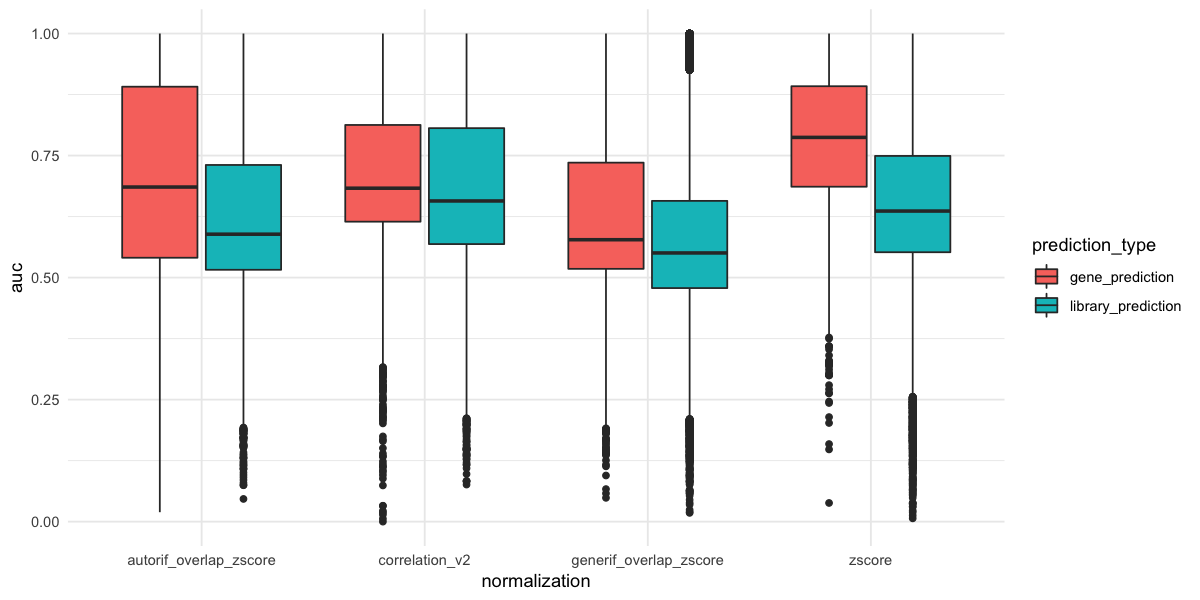

In [25]:
%%R -i plot_dataframe -h 600 -w 1200 -r 120
#ticks <- seq()
ggplot(plot_dataframe, aes(x=normalization, y=auc, fill=prediction_type)) +
geom_boxplot() +
#facet_wrap(~, scales='free') +
#coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
#scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#ggtitle('') +
#geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
#guides(fill=FALSE) +
theme_minimal()

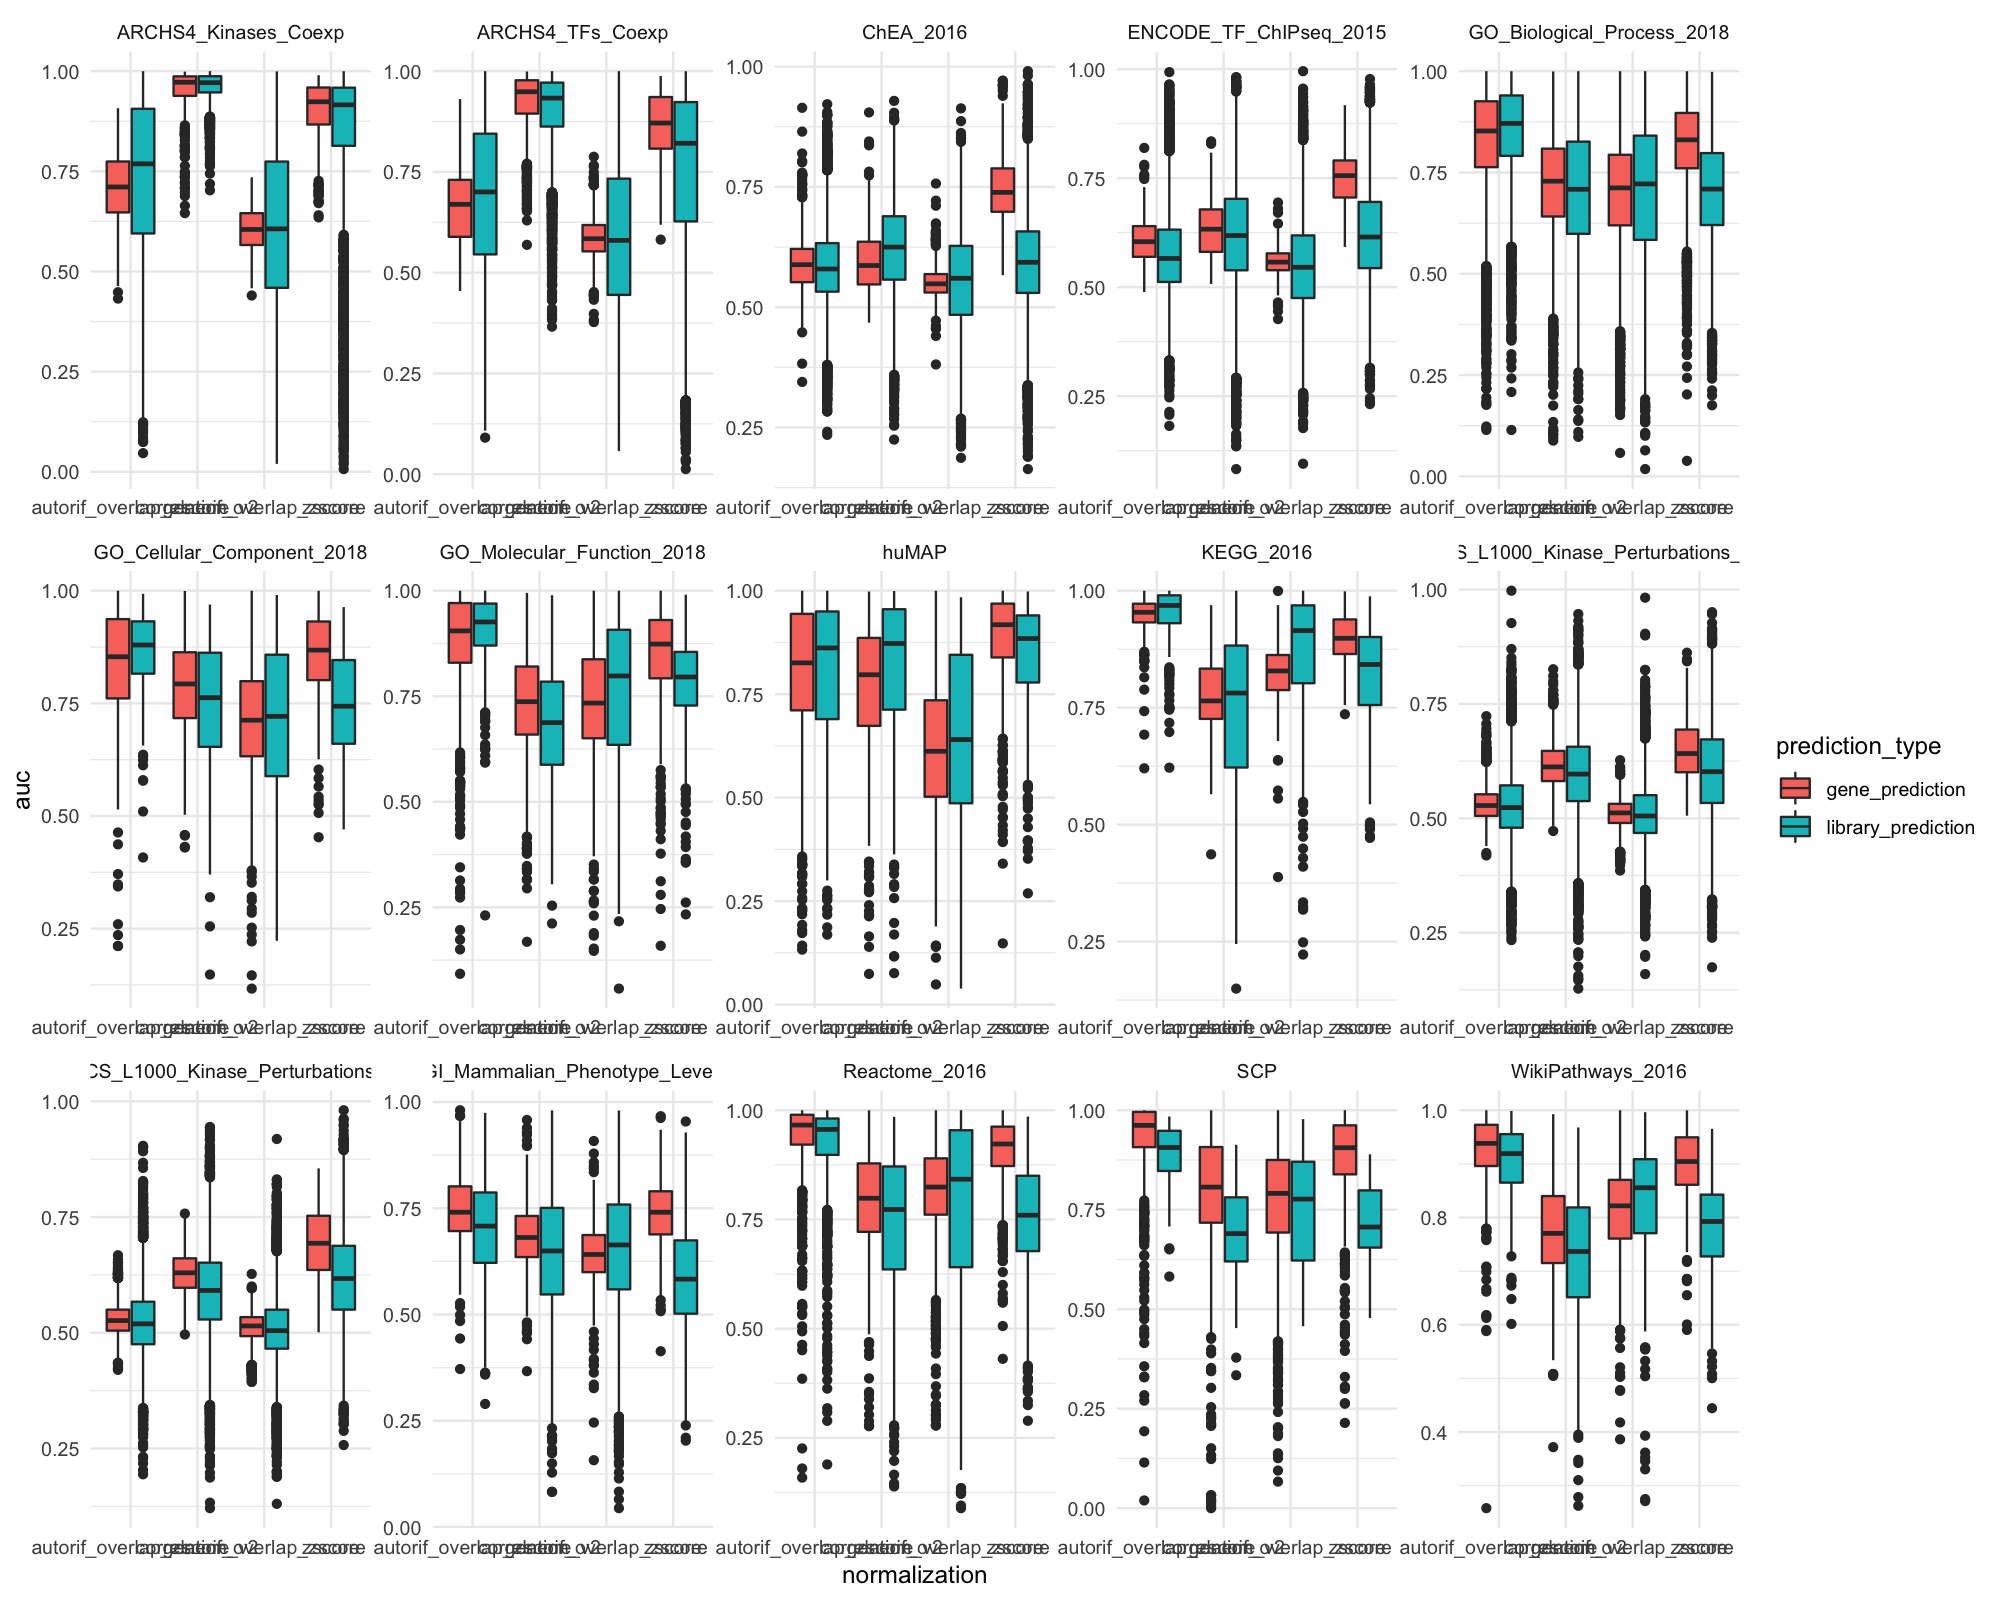

In [36]:
%%R -i plot_dataframe -h 1600 -w 2000 -r 160
#ticks <- seq()
ggplot(plot_dataframe, aes(x=normalization, y=auc, fill=prediction_type)) +
geom_boxplot() +
facet_wrap(~library, ncol=5, scales='free') +
# coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
#scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#ggtitle('') +
#geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
#guides(fill=FALSE) +
theme_minimal()

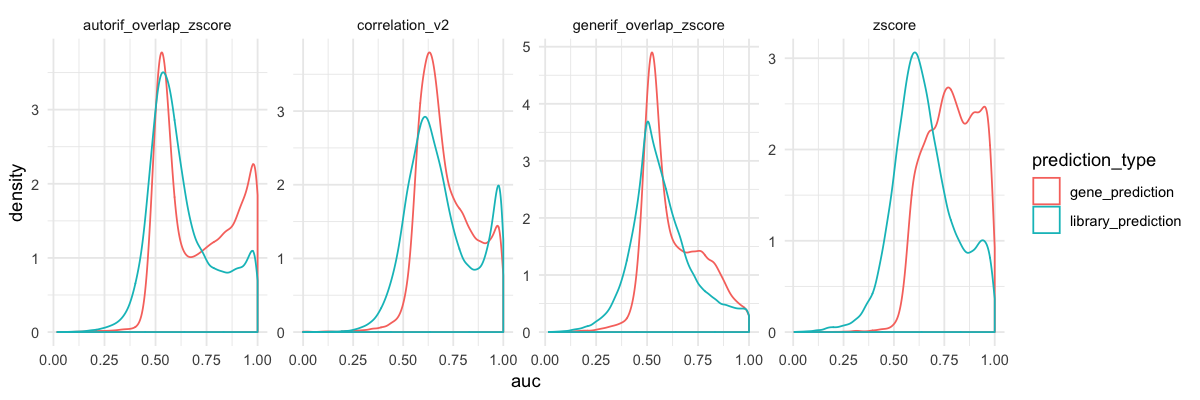

In [21]:
%%R -i plot_dataframe -h 400 -w 1200 -r 120
#ticks <- seq()
ggplot(plot_dataframe, aes(x=auc, color=prediction_type)) +
geom_density() +
facet_wrap(~normalization, ncol=4, scales='free') +
#coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
#scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#ggtitle('') +
#geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
#guides(fill=FALSE) +
theme_minimal()

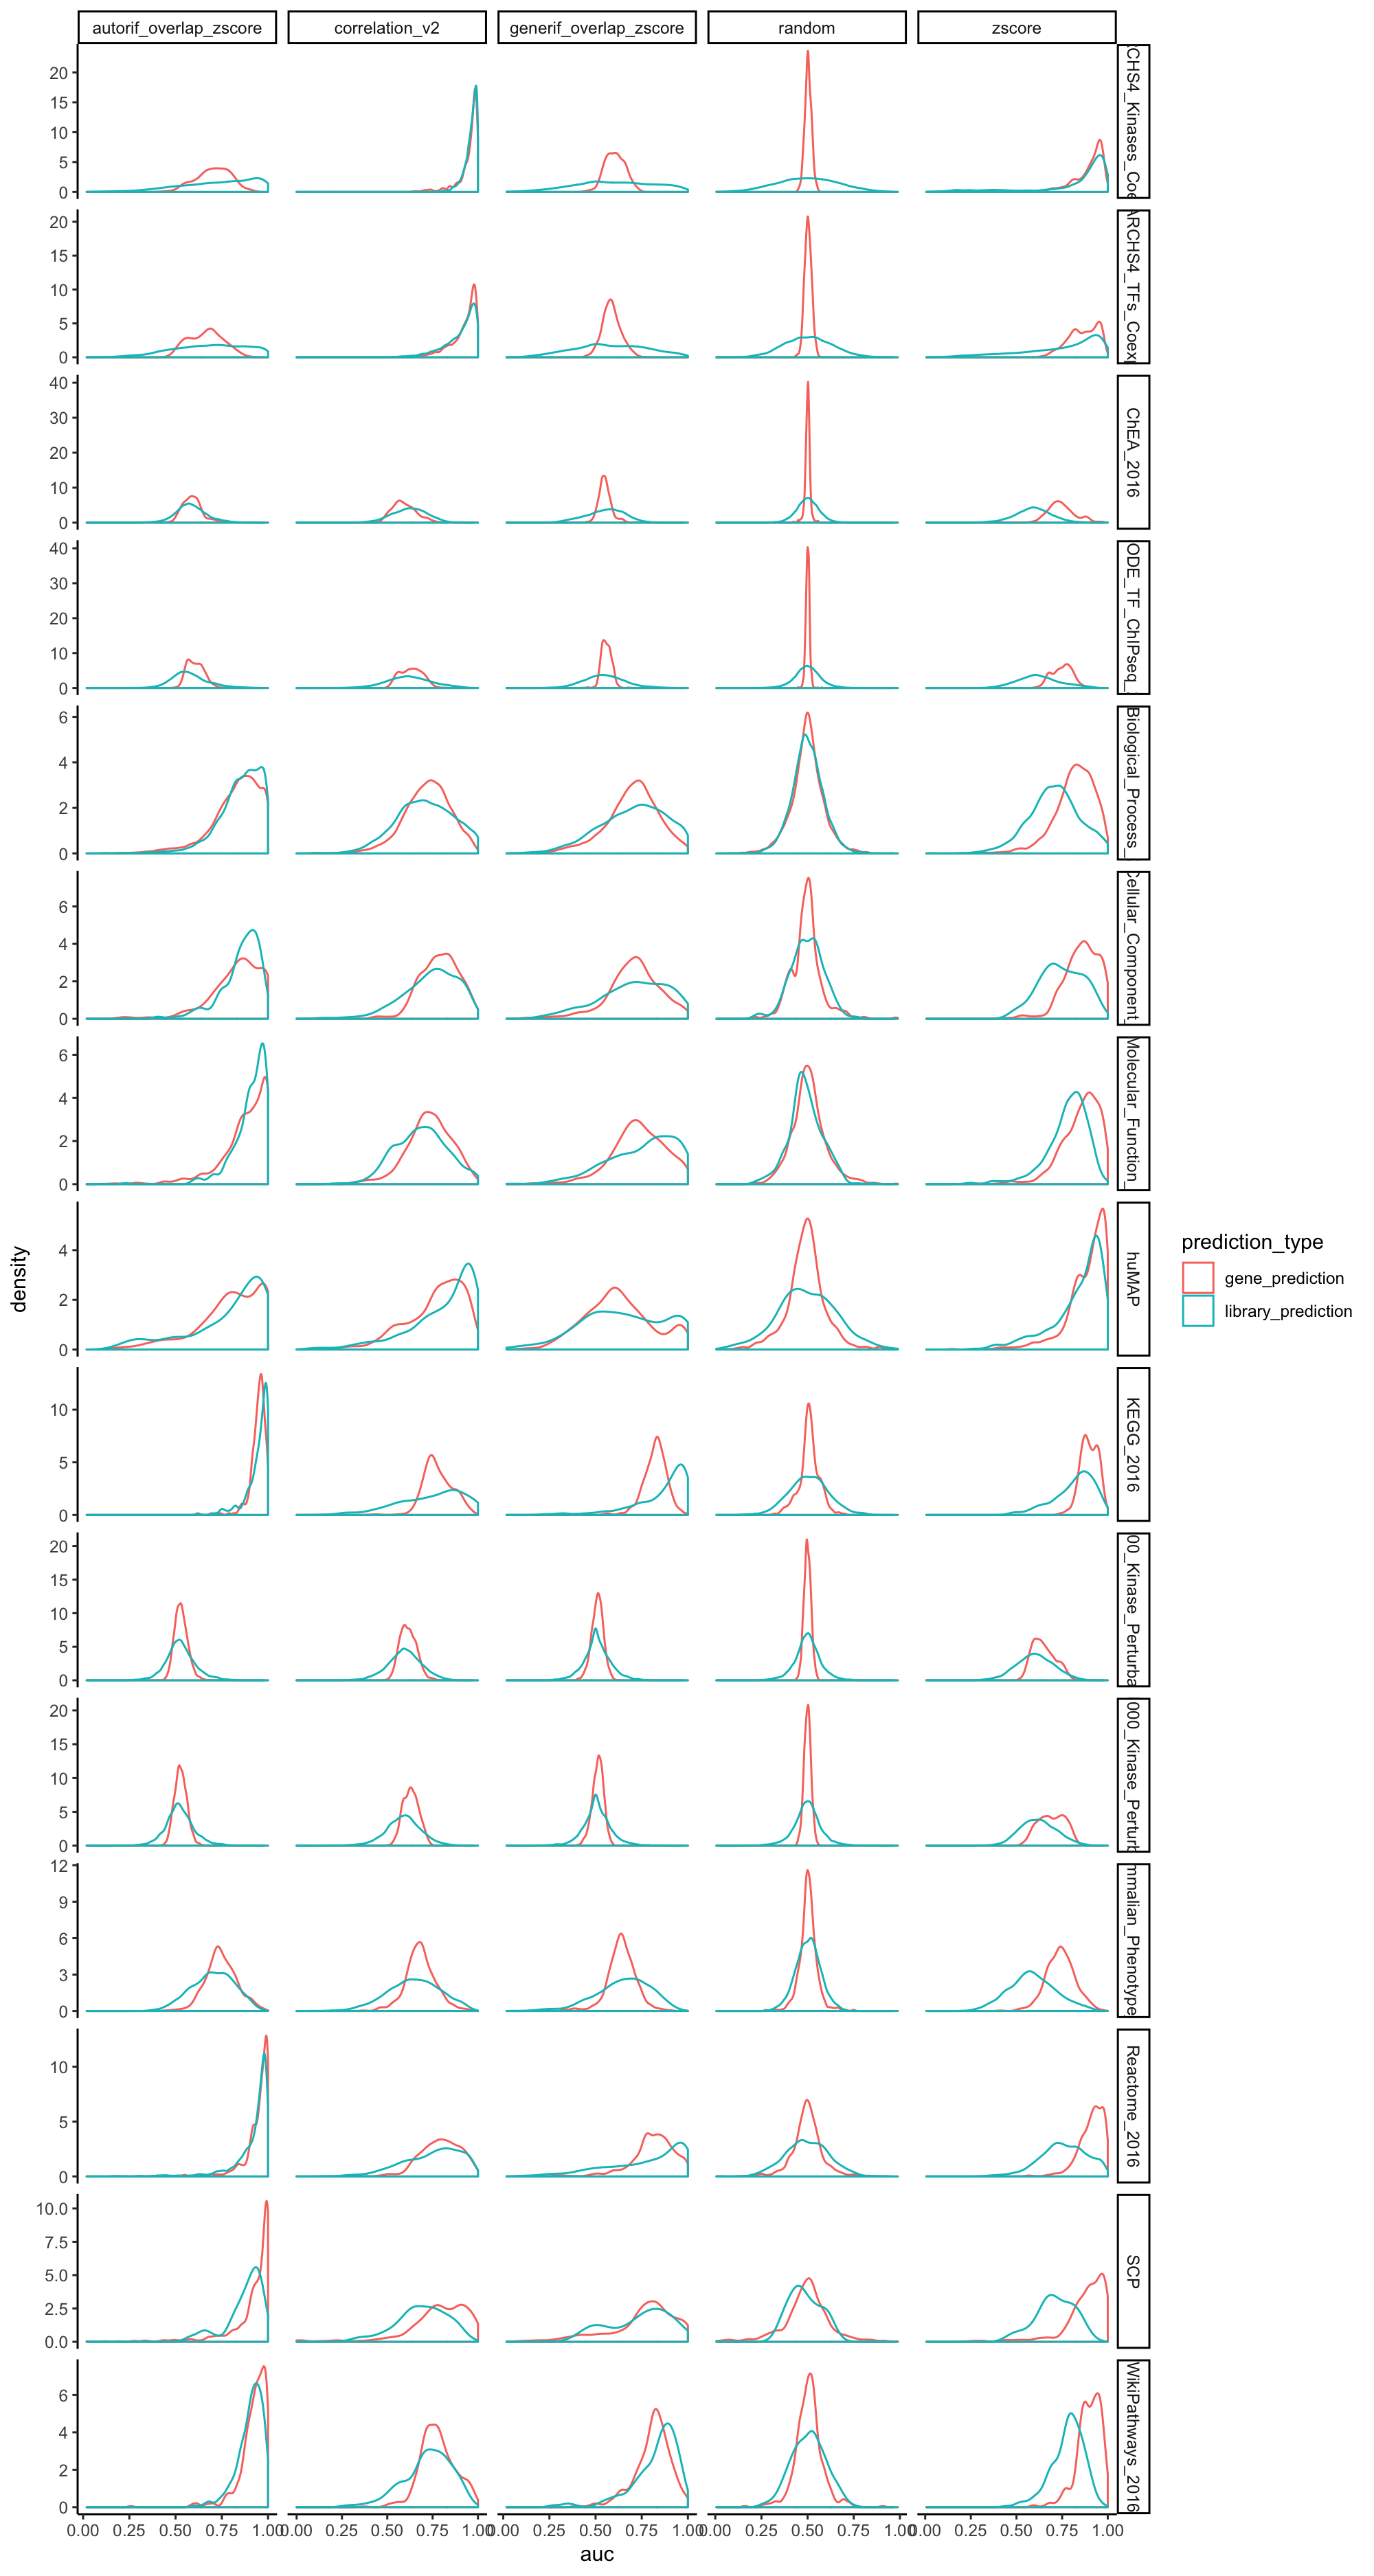

In [45]:
%%R -i plot_dataframe -h 3750 -w 2000 -r 200
#ticks <- seq()
ggplot(plot_dataframe, aes(x=auc, color=prediction_type)) +
geom_density() +
facet_grid(library~normalization, scales='free_y') +
#coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
#scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#ggtitle('') +
#geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
#guides(fill=FALSE) +
theme_classic()